<a href="https://colab.research.google.com/github/Nnamaka/Music_Genre_Classification/blob/main/music_classificatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Music Genre Classification

In [2]:
# mount your google drive in the current notebook
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/cs"

In [3]:
%cd /content/gdrive/My Drive/Kaggle/cs
!pwd

/content/gdrive/My Drive/Kaggle/cs
/content/gdrive/My Drive/Kaggle/cs


Download the "gtzan-dataset-music-genre-classification" dataset from kaggle. To avoid running the code and downloading the dataset over and over again, I commented out the line of code for downloading the dataset right after downloading the dataset

In [5]:

#!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:12<00:00, 117MB/s]
100% 1.21G/1.21G [00:12<00:00, 107MB/s]


Now unzip the zip file from kaggle right into the current directory. Note: I had to navigate into the google drive file directory where I want the dataset downloaded

In [ ]:

#!unzip \*.zip && rm *.zip

I intend to use some python scripts from my github repo. the following code clones the repo I created for the music genre classification into my google drive.

In [ ]:

#%cd ML_with_TF/
#!git clone https://github.com/Nnamaka/Music_Genre_Classification.git

#Get the data
"First things first" - (courtesy of J.cole )



In [3]:
import librosa, IPython
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

#About the data 
We have 3 folders that has the dataset distributed in each of them. "Genres Orignal", "Images Original", and two CSV files.

"Genres Original" contains a collection of 10 genres with 100 audio files each, all having a length of 30 seconds.

"Images original" contains files with a visual representation for each audio file.

The remaining csv files contains sound features of each audio file.

Lets begin making some data visualization!

In [4]:
import numpy as np 
import pandas as pd
import os
import librosa
import librosa.display
import seaborn as sns

In [5]:
df=pd.read_csv("/content/gdrive/My Drive/Kaggle/cs/Data/features_30_sec.csv")
df.iloc[:,:20].head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708


In [7]:
df.shape

(1000, 60)

From our "features_30_sec" dataset, we have 60 columns! and 1000 rows

In [8]:

general_path = '/content/gdrive/My Drive/Kaggle/cs/Data/'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Our datasets contains 10 generes:
 * Blues
 * Classical
 * Country
 * Disco
 * Hiphop
 * Jazz
 * Metal
 * Pop
 * Reggae
 * Rock

## A bit of audio data analysis
Audio data analysis can be done on audio files with the help of some amazing python libraries like librosa and PyAudio.
Sound excerpts are digital audio files in ".wav" format. sound waves are digitized by sampling them at discrete intervals known as the sampling rate eg 44.1KHz for CD quality-audio: samples are taken 44,100 times per second.
lets begin our analysis by making necessary imports.

lets take a look at a Jazz file

In [13]:
jazz_file = '/content/gdrive/My Drive/Kaggle/cs/Data/genres_original/jazz/jazz.00096.wav'

##**Chroma Frequencies**


we begin by visualizing the features of an audio file as indicated in our dataset. lets visualize the **chroma frequencies** of our jazz wav file

Chroma-based featurescan be used to categorize music with meaningful pitches (usually into 12 scales) and whose tuning can equated to the equal-tempered scale.

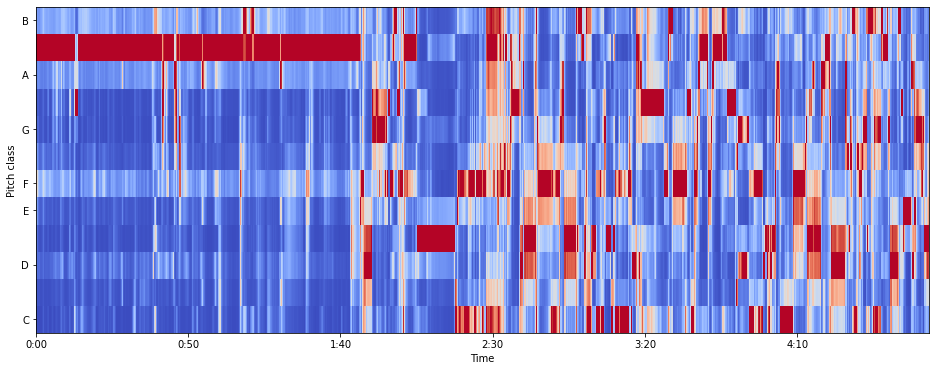

In [14]:
y, sr = librosa.load(jazz_file)

hop_length = 5000

jazz_file, _ = librosa.effects.trim(y)
chromagram = librosa.feature.chroma_stft(jazz_file, sr=sr)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

##**The Spectral Centroid**

The spectral centroid is a measure used to characterise an audio spectrum by finding its center of mass. its connected to the brightness of a sound, which refers to the higher mid and treble parts of the frequency.

How do our jass song soud?

In [15]:
import IPython.display as ipd 

ipd.Audio( y, rate=sr)

lets plot the spectral centroids for our jazz file for visualization

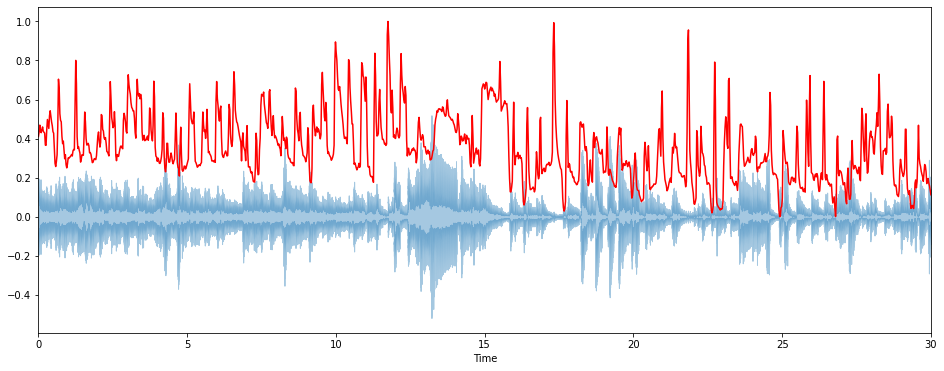

In [21]:
import sklearn as sk

spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(y_, axis=0):
    return sk.preprocessing.minmax_scale(y_, axis=axis)


plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

plt.show()